In [3]:
import jax.numpy as jnp
import jax
from fbpinns.problems import Problem

class Poisson1D(Problem):
    """
    Solves the 1D Poisson equation
        - u_xx = f(x,y)
    on the domain [0,1] with Dirichlet boundary conditions u = 0 on ∂Ω.

    We choose f(x,y) such that the exact solution is:
        u(x,y) = sin(πx)
    which implies f(x,y) = π²sin(πx).
    """

    @staticmethod
    def init_params(f_coeff=jnp.pi ** 2, sd=0.1):
        # 'dims': (ud, xd) => u is scalar (ud=1) and x is 2D (xd=2)
        static_params = {
            "dims": (1, 1),
            "f_coeff": f_coeff,  # coefficient in the forcing function f(x,y)
            "sd": sd
        }
        return static_params, {}

    @staticmethod
    def sample_constraints(all_params, domain, key, sampler, batch_shapes):
        # --- Physics loss: sample interior points ---
        # x_batch_phys: an array of shape (n_phys, 2)
        x_batch_phys = domain.sample_interior(all_params, key, sampler, batch_shapes[0])
        required_ujs_phys = (
            (0, (0, 0)), # u_xx
        )

        return [[x_batch_phys, required_ujs_phys],]
    
    @staticmethod
    def constraining_fn(all_params, x_batch, u):
        sd = all_params["static"]["problem"]["sd"]
        x, tanh = x_batch[:,0:1], jax.nn.tanh
        u = tanh((x)/sd) * tanh((1-x)/sd) * u
        return u

    @staticmethod
    def loss_fn(all_params, constraints):
        # --- Physics loss ---
        # For the physics group, the constraints have been replaced with the evaluated quantities:
        # [x_batch_phys, u_xx, u_yy]
        x_phys, u_xx = constraints[0]
        x = x_phys[:, 0:1]

        # Compute the forcing term f(x,y) = 2π² sin(πx) sin(πy)
        f_coeff = all_params["static"]["problem"]["f_coeff"]
        f_val = f_coeff * jnp.sin(jnp.pi* x)

        # The physics residual is: u_xx + u_yy + f(x,y)
        phys_residual = u_xx + f_val

        return jnp.mean(phys_residual ** 2)

    @staticmethod
    def exact_solution(all_params, x_batch, batch_shape=None):
        # The exact solution is u(x,y) = sin(πx) sin(πy)
        x = x_batch[:, 0:1]
        u = jnp.sin(jnp.pi* x)
        return u
    

[Errno 16] Device or resource busy: 'results/summaries/test/.nfs000000005a356ae3000009ab'
[INFO] 2025-03-28 20:45:51 - <fbpinns.constants.Constants object at 0x74895c090d70>
run: test
domain: <class 'fbpinns.domains.RectangularDomainND'>
domain_init_kwargs: {'xmin': array([0.]), 'xmax': array([1.])}
problem: <class '__main__.Poisson1D'>
problem_init_kwargs: {}
decomposition: <class 'fbpinns.decompositions.RectangularDecompositionND'>
decomposition_init_kwargs: {'subdomain_xs': [array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])], 'subdomain_ws': [array([0.32222222, 0.32222222, 0.32222222, 0.32222222, 0.32222222,
       0.32222222, 0.32222222, 0.32222222, 0.32222222, 0.32222222])], 'unnorm': (0.0, 1.0)}
network: <class 'fbpinns.networks.ChebyshevKAN'>
network_init_kwargs: {'input_dim': 1, 'output_dim': 1, 'degree': 10}
n_steps: 15000
scheduler: <class 'fbpinns.schedulers.AllActiveSchedulerND'>
scheduler_

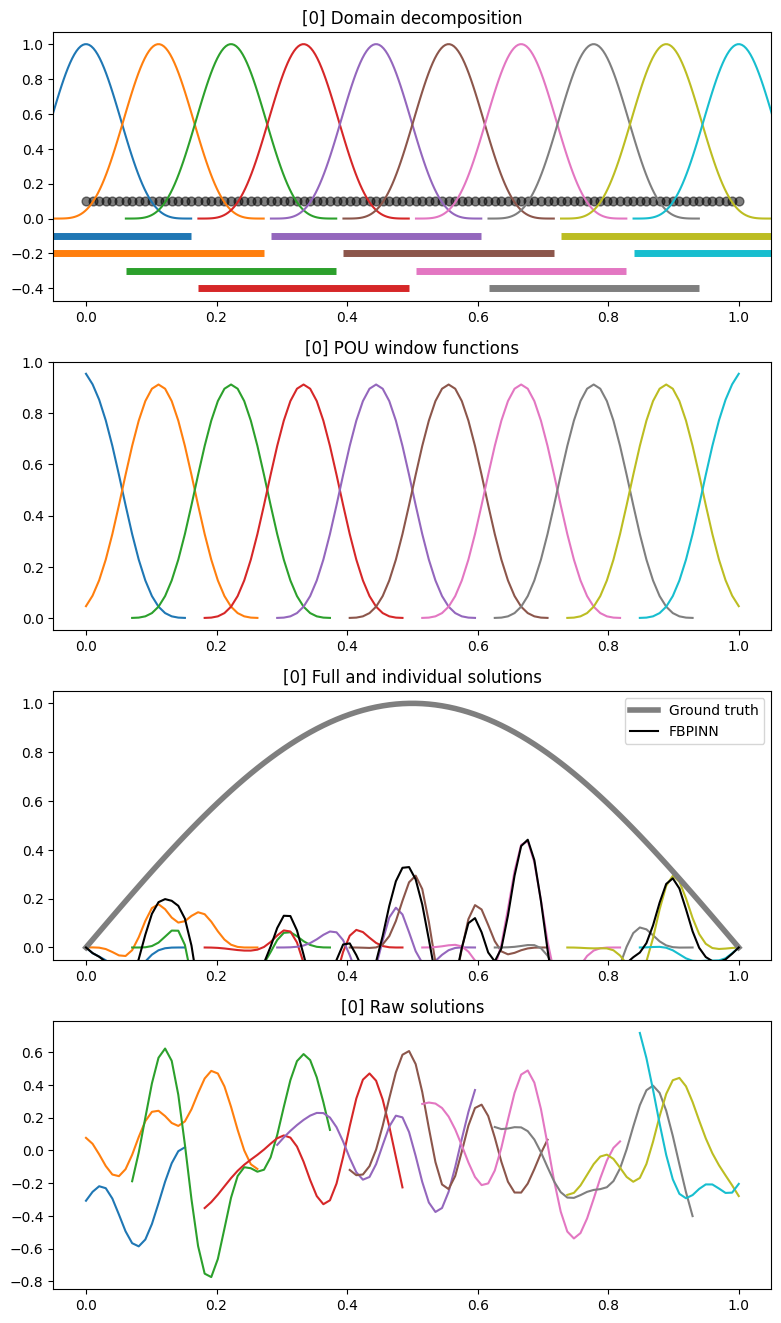

[INFO] 2025-03-28 20:45:52 - [i: 1000/15000] loss: 70.0545 rate: 1789.6 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:52 - [i: 2000/15000] loss: 55.9610 rate: 16823.3 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:52 - [i: 3000/15000] loss: 46.8986 rate: 16211.0 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:52 - [i: 4000/15000] loss: 38.0837 rate: 14789.9 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:52 - [i: 5000/15000] loss: 28.5107 rate: 17649.8 elapsed: 0.00 hr test
(100, 1) (100, 1) (100, 1) (10, 100, 1) (10, 100, 1) (10, 100, 1) (100, 1) (100,)
(1, 1) 1
True


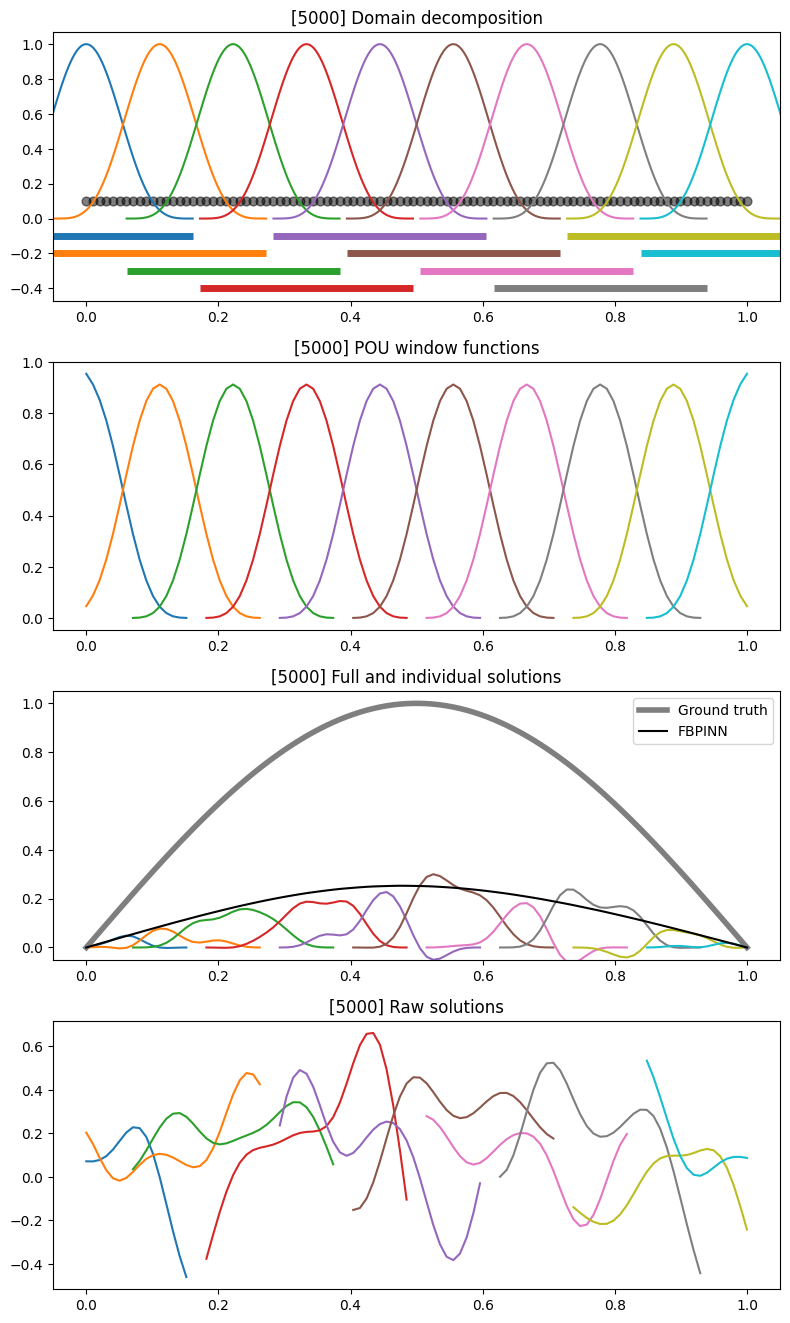

[INFO] 2025-03-28 20:45:53 - [i: 6000/15000] loss: 18.4381 rate: 15807.1 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:53 - [i: 7000/15000] loss: 9.3484 rate: 17668.0 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:53 - [i: 8000/15000] loss: 3.3952 rate: 16119.0 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:53 - [i: 9000/15000] loss: 1.0877 rate: 17217.6 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:53 - [i: 10000/15000] loss: 0.5737 rate: 16574.3 elapsed: 0.00 hr test
(100, 1) (100, 1) (100, 1) (10, 100, 1) (10, 100, 1) (10, 100, 1) (100, 1) (100,)
(1, 1) 1
True


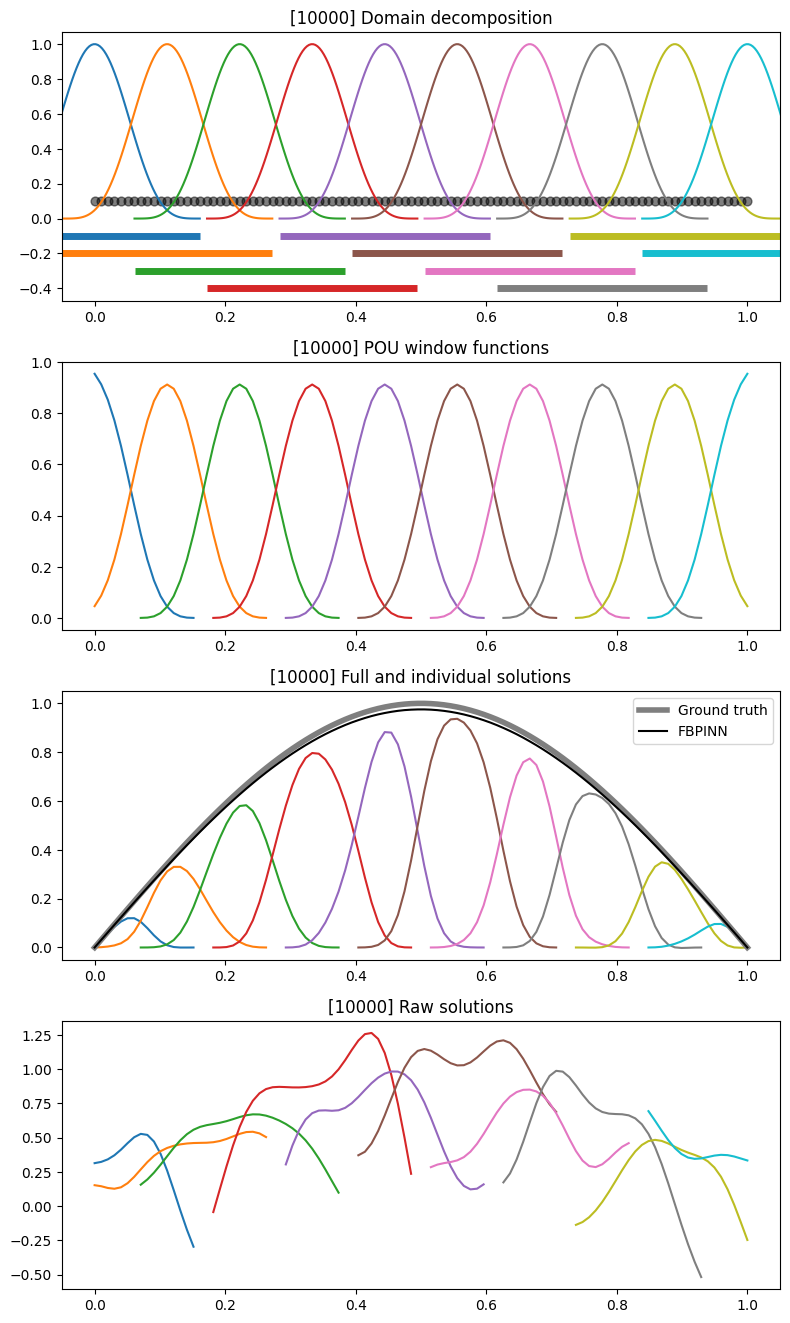

[INFO] 2025-03-28 20:45:54 - [i: 11000/15000] loss: 0.4367 rate: 16688.6 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:54 - [i: 12000/15000] loss: 0.3391 rate: 16416.0 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:54 - [i: 13000/15000] loss: 0.2580 rate: 17414.1 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:54 - [i: 14000/15000] loss: 0.2090 rate: 17623.0 elapsed: 0.00 hr test
[INFO] 2025-03-28 20:45:54 - [i: 15000/15000] loss: 0.1624 rate: 17486.7 elapsed: 0.00 hr test
(100, 1) (100, 1) (100, 1) (10, 100, 1) (10, 100, 1) (10, 100, 1) (100, 1) (100,)
(1, 1) 1
True


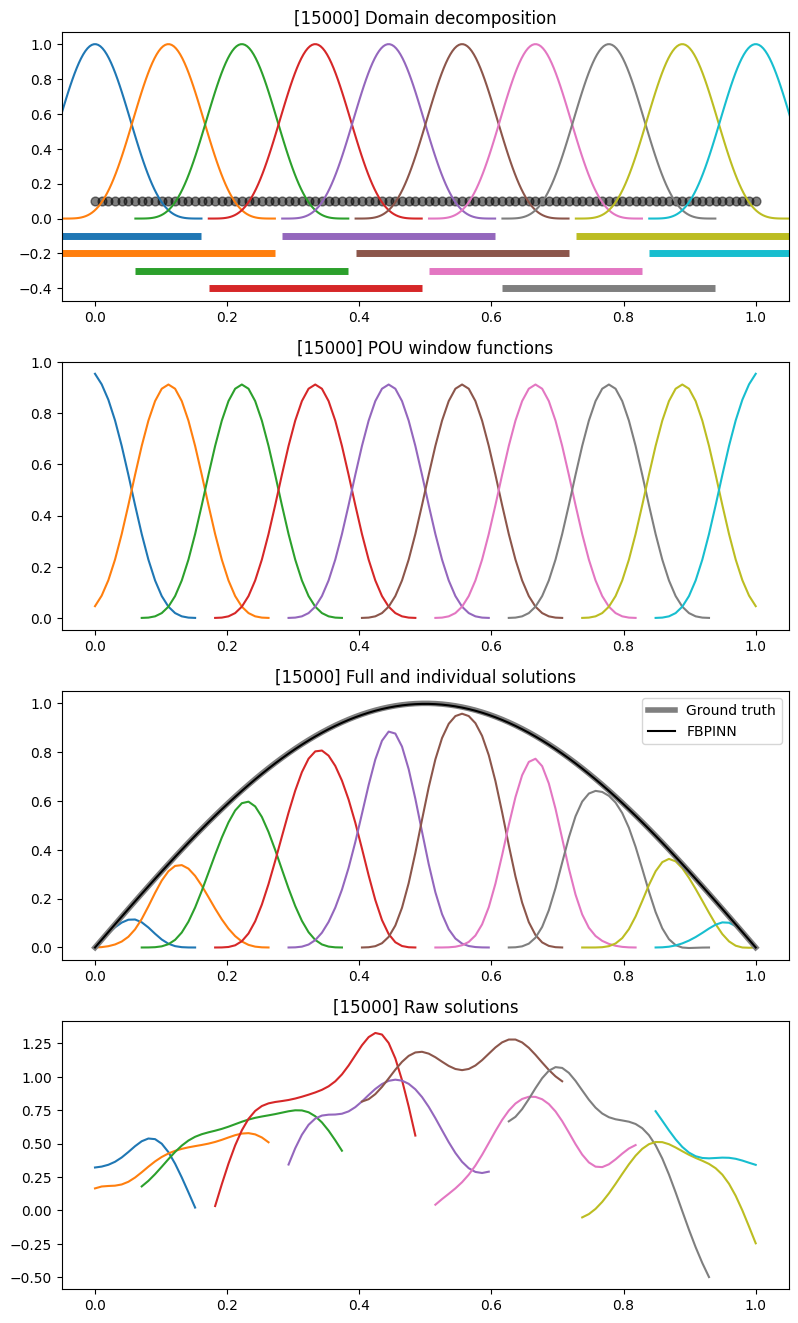

[INFO] 2025-03-28 20:45:55 - [i: 15000/15000] Training complete


In [6]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import BurgersEquation2D
from fbpinns.decompositions import RectangularDecompositionND
from fbpinns.networks import ChebyshevKAN, FCN
from fbpinns.schedulers import LineSchedulerRectangularND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

subdomain_xs=[np.linspace(0,1,10)]
c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0.,]),
        xmax=np.array([1.,])
        ),
    problem=Poisson1D,
    problem_init_kwargs = dict(),
    decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xs=subdomain_xs,
        subdomain_ws=get_subdomain_ws(subdomain_xs, 2.9),
        unnorm=(0., 1.),
    ),
    # network=FCN,
    # network_init_kwargs = dict(
    #     layer_sizes = (2, 16, 16, 1),
    # ),
    network=ChebyshevKAN,
    network_init_kwargs=dict(
        input_dim=1,
        output_dim=1,
        degree=10
    ),
    # First element: interior sampling shape for the physics loss (here 200 x 200 points)
    # Second element: boundary sampling shapes; for 2D, we need 4 tuples (one for each boundary)
    ns=((100,),),
    # n_test provides the test sampling shape for the interior (here also 200 x 200)
    n_test=(100,),
    n_steps=15000,
    clear_output=False,
)

run = FBPINNTrainer(c)
all_params = run.train()